In [2]:
# ! pip install fiftyone

In [3]:
import os
import time
import fiftyone as fo
import fiftyone.zoo as foz

## (A.) Visualize images in FCAT image dataset

In [4]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir="fcat/coco/fcat-manacus-v1"

In [6]:
! tree -L 2 $dataset_dir

fcat/coco/fcat-manacus-v1
├── annotations
│   ├── train.json
│   └── val.json
├── train
│   └── images
└── val
    └── images

5 directories, 2 files


#### Load the dataset, using tags to mark the samples in each split

In [7]:
# Name of the dataset in session
name = "export_coco_fcat_v1_" + str(time.time())
# The splits to load 
splits = ["train"] # "train", "val", 

In [8]:
# The type of the dataset being imported
dataset_type = fo.types.COCODetectionDataset  # for example

# Import the dataset
dataset = fo.Dataset.from_dir(
    name = name,
    dataset_type=dataset_type,
    data_path=os.path.join(dataset_dir, splits[0], "images"),
    labels_path=os.path.join(dataset_dir, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |███████████████| 2904/2904 [2.4s elapsed, 0s remaining, 1.2K samples/s]        


In [9]:
print(dataset.summary())

Name:        export_coco_fcat_v1_1721763591.7358136
Media type:  image
Num samples: 2904
Persistent:  False
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [10]:
print(dataset.stats())

{'samples_count': 2904, 'samples_bytes': 1527187, 'samples_size': '1.5MB', 'total_bytes': 1527187, 'total_size': '1.5MB'}


### Creates a session and opens the App in the output of the cell


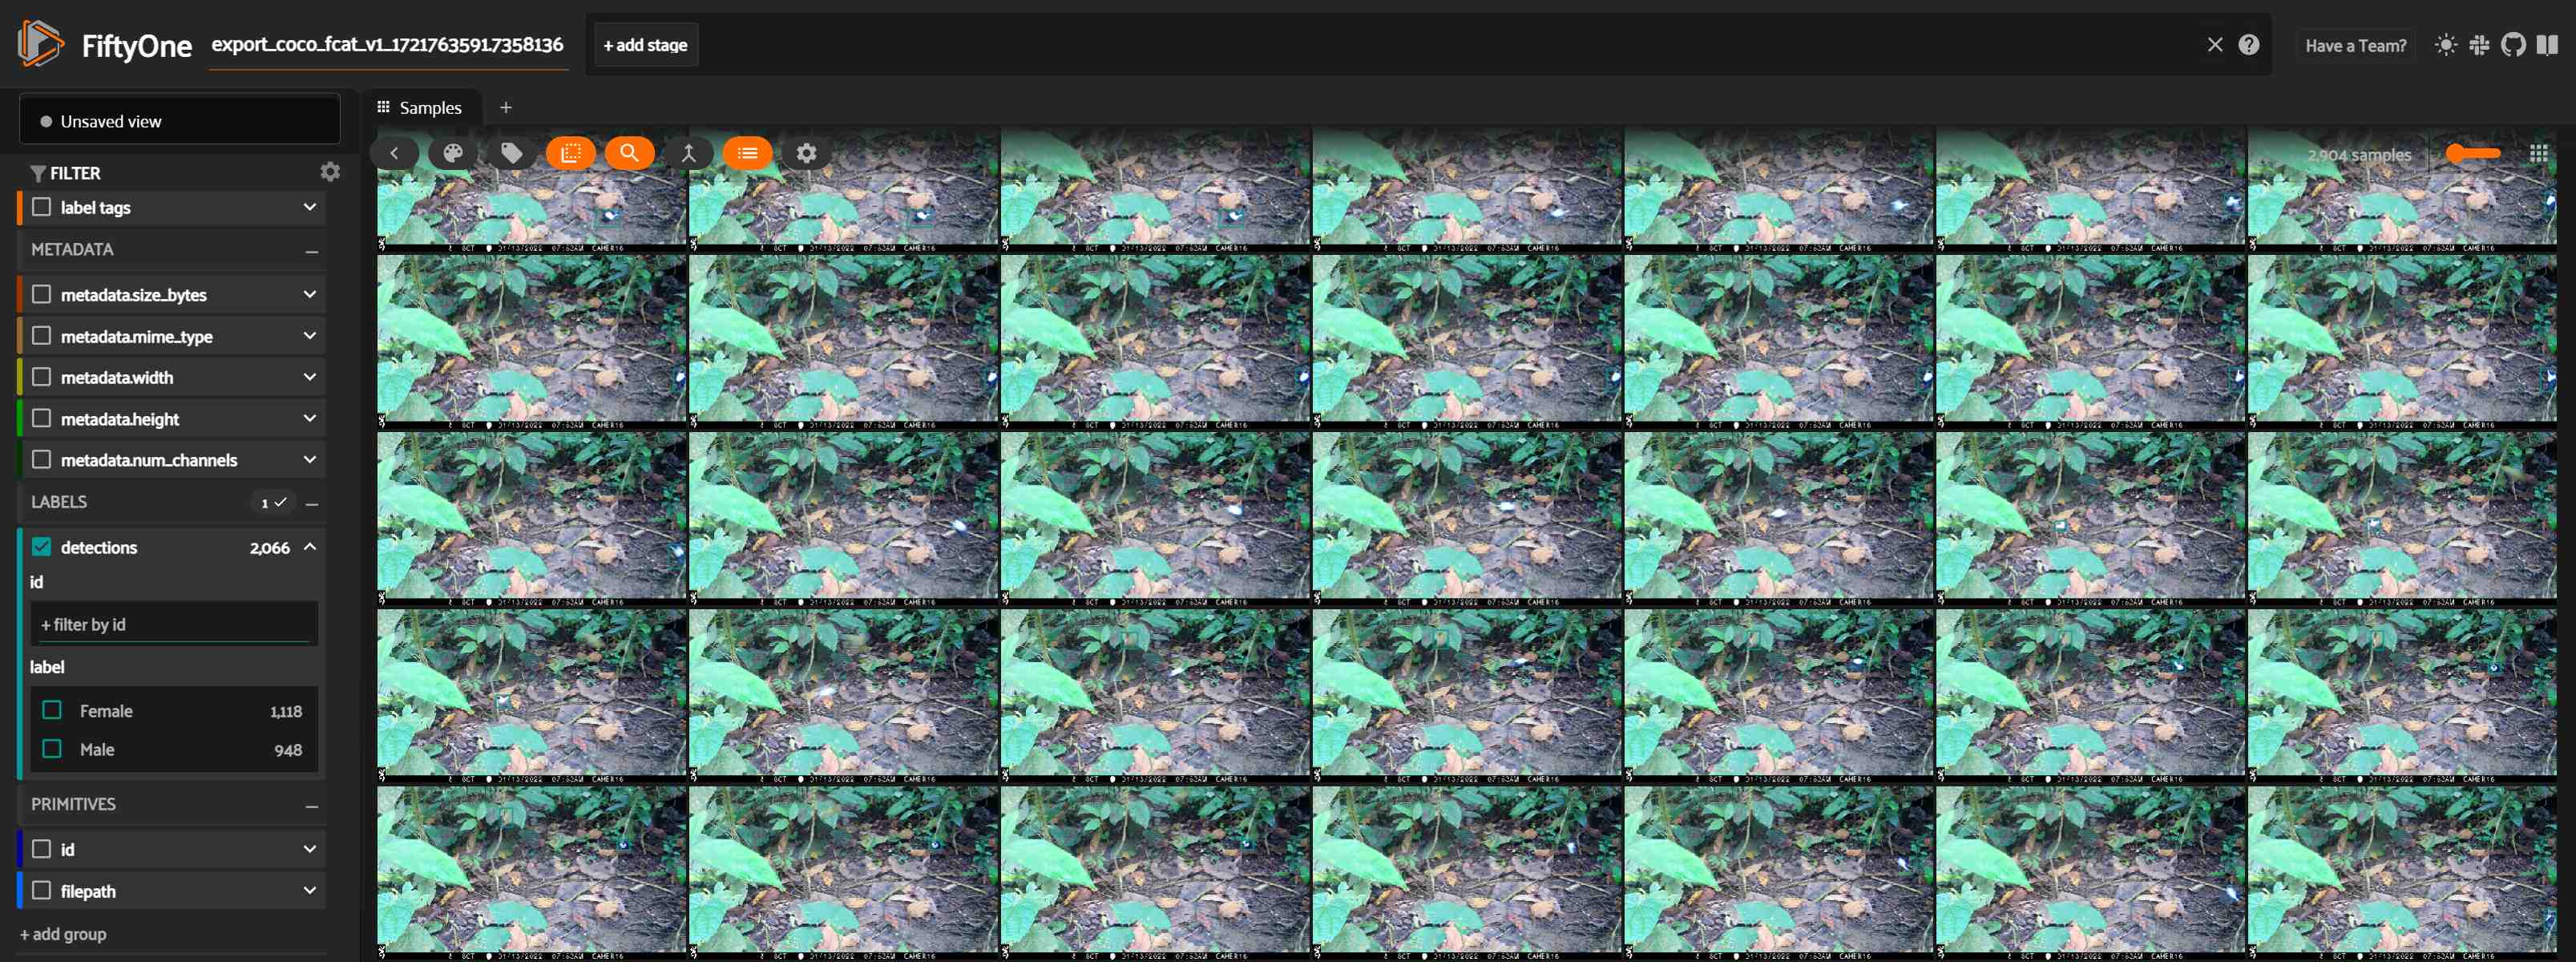

In [11]:
session = fo.launch_app(dataset)

In [12]:
# Replace active App instance with screenshot so App state is viewable offline
session.freeze()

## (B.) Visualize images in eBird image dataset

In [14]:
# Path of the dataset formatted in ~/images/**/*.jpg and ~/labels/**/*.txt
dataset_dir_ebird="ebird/coco"
! tree -L 2 $dataset_dir_ebird

ebird/coco
├── annotations
│   ├── all_images.json
│   ├── cvat_all_sme_v2.json
│   ├── cvat_all_v1.json
│   ├── test.json
│   ├── train.json
│   └── val.json
├── dataset_cocofy.py
├── images_all.csv
├── test
│   └── images
├── train
│   └── images
└── val
    └── images

7 directories, 8 files


In [17]:
# The splits to load 
splits = ["train"] # "train", "val", 
# Import the dataset
dataset_ebird = fo.Dataset.from_dir(
    name = "export_coco_ebird_v1_" + str(time.time()),
    dataset_type=fo.types.COCODetectionDataset,
    data_path=os.path.join(dataset_dir_ebird, splits[0], "images"),
    labels_path=os.path.join(dataset_dir_ebird, "annotations", "{}.json".format(splits[0])),
    tags=splits[0]
)

 100% |███████████████| 2689/2689 [2.2s elapsed, 0s remaining, 1.2K samples/s]      



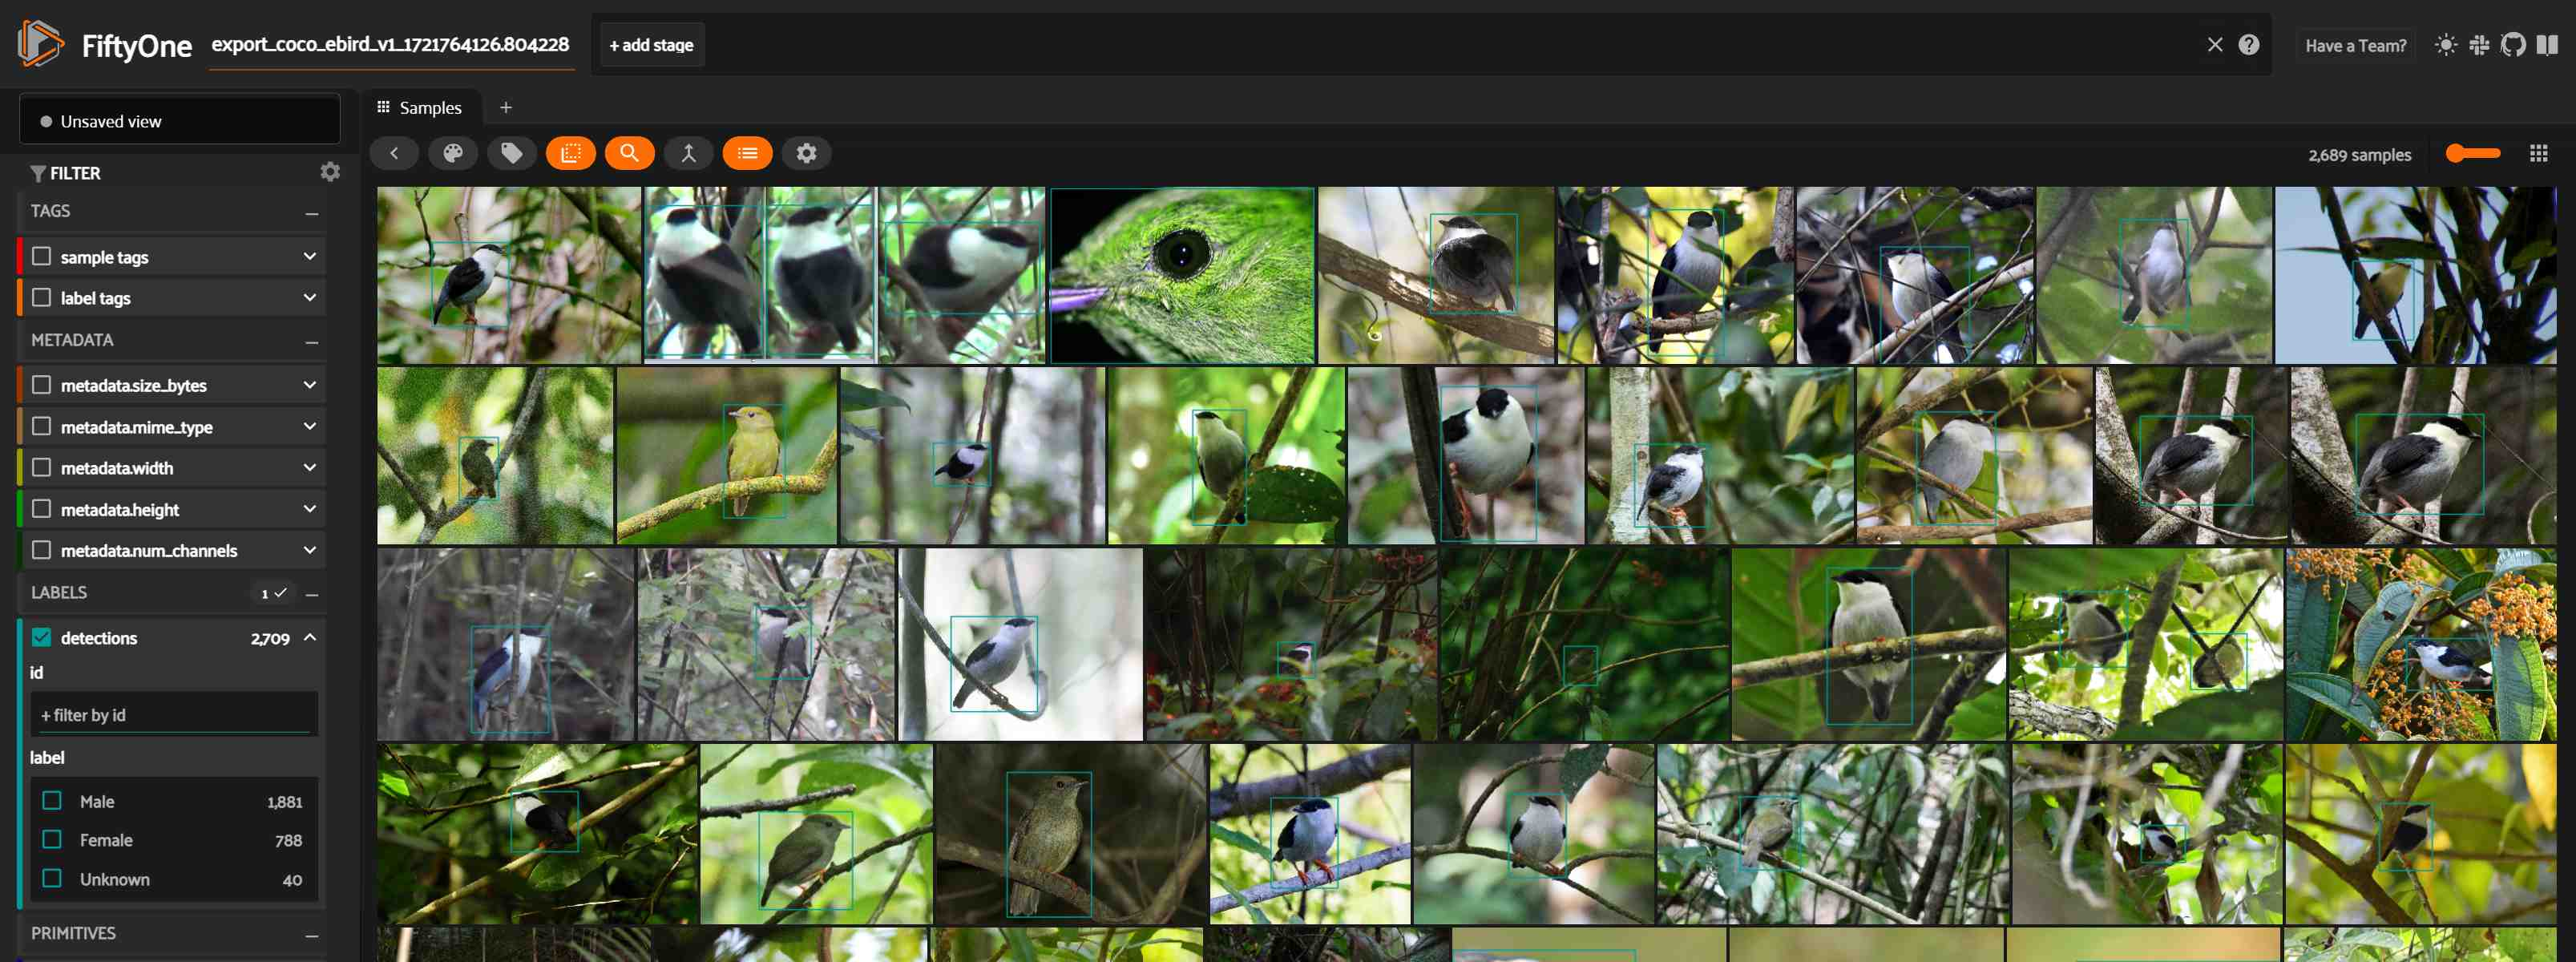

In [18]:
session_ebird = fo.launch_app(dataset_ebird)

In [19]:
# Replace active App instance with screenshot so App state is viewable offline
session_ebird.freeze()